10 Вариант
![fsfd](./img.png)

In [47]:
def plot_slices_implicit(x, t, u, Nx):
    plt.figure(figsize=(8, 5))

    for n in range(0, len(t), len(t) // 5):
        plt.plot(x, u[:, n], label=f"t={t[n]:.2f}")

    plt.title(f"Неявная схема: Nx={Nx} (h={x[1] - x[0]:.3f})")
    plt.xlabel("x")
    plt.ylabel("U(x, t)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [46]:
def plot_slices_explicit(x, t, u, Nx):
    plt.figure(figsize=(8, 5))

    for n in range(0, len(t), len(t) // 5):
        plt.plot(x, u[n, :], label=f"t={t[n]:.2f}")

    plt.title(f"Явная схема: Nx={Nx} (h={x[1] - x[0]:.3f})")
    plt.xlabel("x")
    plt.ylabel("U(x, t)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Задание 1

In [51]:
import numpy as np
import matplotlib.pyplot as plt


def solve_heat_equation_explicit(f, T=1.0, Nx=10, h=None):
    alpha = 4.0

    if h is None:
        h = 1.0 / Nx
        x = np.arange(0, 1.0 + h, h)
    else:
        x = np.arange(0, h * (Nx + 1), h)

    tau = h ** 2 / 2 / alpha  # условие устойчивости для явной разностной схемы

    t = np.arange(0, T + tau, tau)

    u = np.zeros((len(t), len(x)))

    u[0, :] = (1.3 * x ** 2 + 1.2) * np.sin(np.pi * x)  # начальное условие
    u[:, 0] = 0
    u[:, -1] = 0

    for n in range(0, len(t) - 1):
        for i in range(1, len(x) - 1):
            d2u_dx2 = (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]) / h ** 2
            du_dx = (u[n, i + 1] - u[n, i - 1]) / (2 * h)
            f_val = f(x[i], t[n])
            u[n + 1, i] = u[n, i] + tau * (alpha * d2u_dx2 + du_dx + f_val)

        u[n + 1, 0] = u[n + 1, 1]  # заграничные условия (производная по x равна 0 => симметрия) 😎
        u[n + 1, Nx] = u[n + 1, Nx - 1]

    return x, t, u


## С h фиксированного размера

In [44]:
alpha = 4

N_vals = np.array([10, 50, 100])
T_val = 1.0

f = lambda x, t: 0

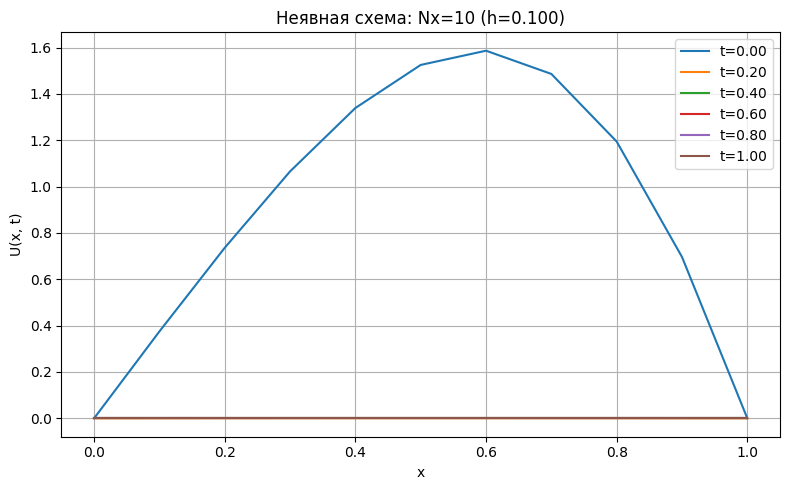

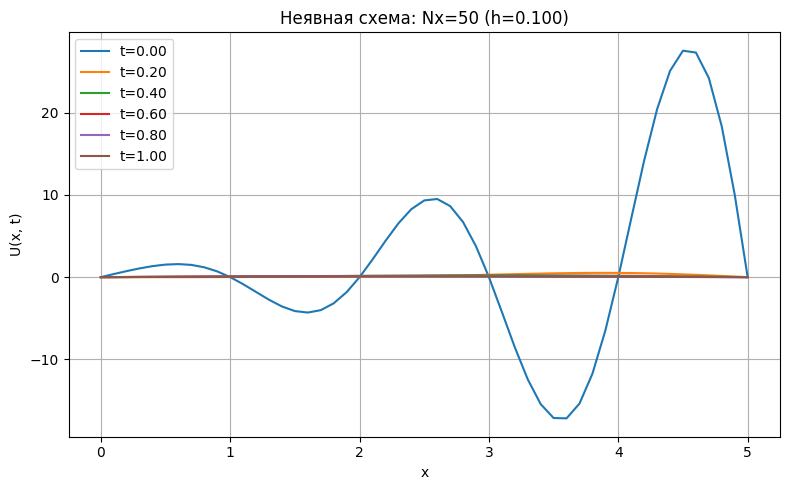

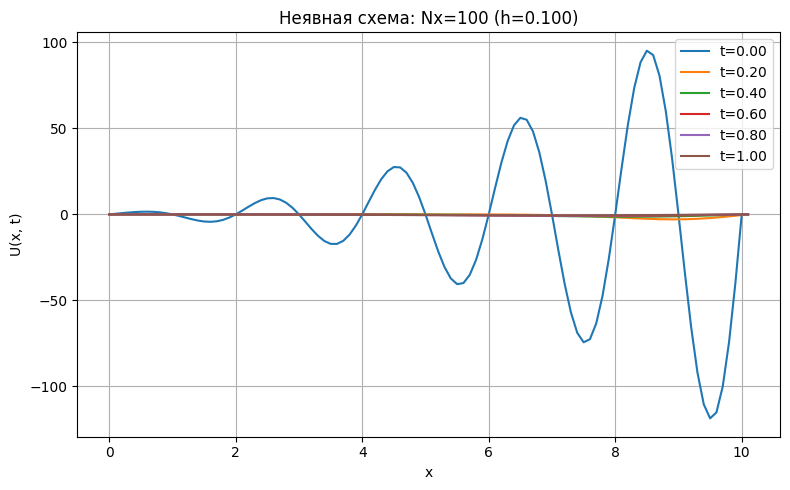

In [52]:
for i, n_i in enumerate(N_vals):
    x, t, u = solve_heat_equation_explicit(f, T_val, n_i, h=0.1)

    plot_slices_explicit(x, t, u, n_i)

## С L = 1.0

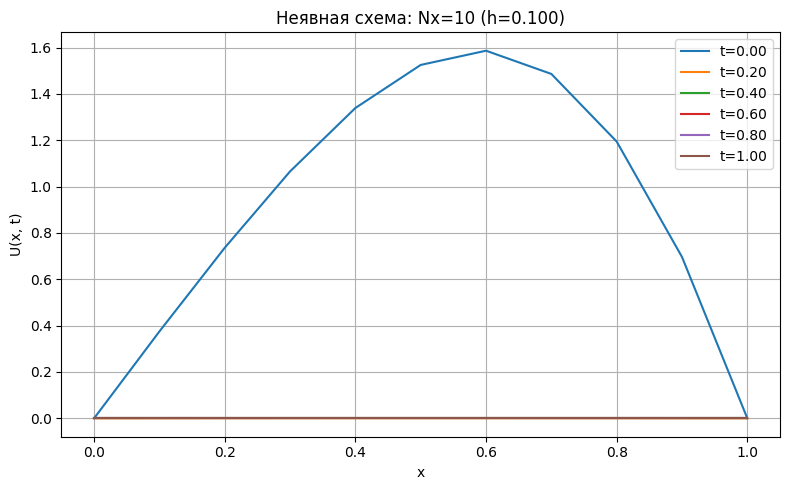

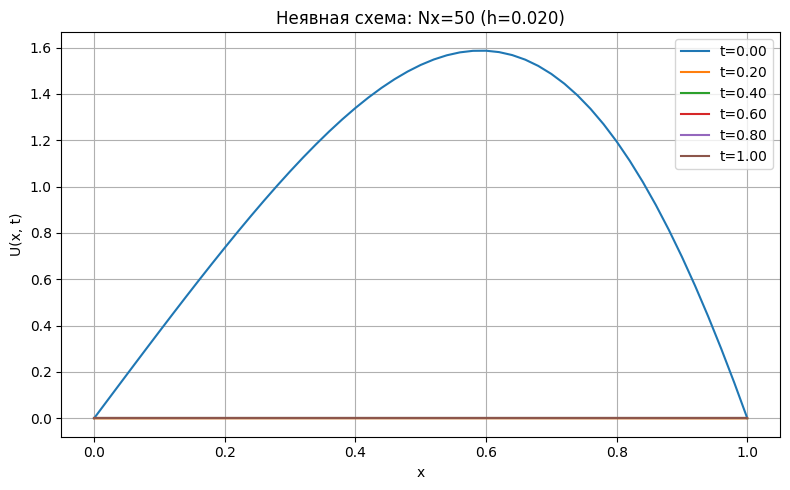

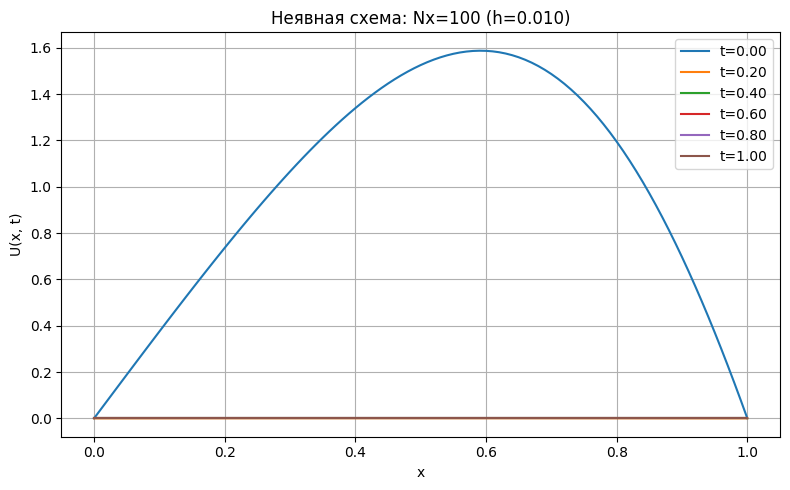

In [53]:
for i, n_i in enumerate(N_vals):
    x, t, u = solve_heat_equation_explicit(f, T_val, n_i)

    plot_slices_explicit(x, t, u, n_i)

# Задание 2

In [54]:
import numpy as np
import matplotlib.pyplot as plt


def solve_heat_equation_implicit(f, T=1.0, Nx=10, h=None):
    alpha = 4.0

    if h is None:
        h = 1.0 / Nx
        x = np.arange(0, 1.0 + h, h)
    else:
        x = np.arange(0, h * (Nx + 1), h)

    tau = h  # для устойчивости

    t = np.arange(0, T + tau, tau)

    U = np.zeros((len(x), len(t)))
    # Начальное условие
    U[:, 0] = (1.3 * x ** 2 + 1.2) * np.sin(np.pi * x)

    for n in range(len(t) - 1):
        tn1 = t[n + 1]

        # Коэффициенты системы (трехдиагональная матрица)
        A = np.zeros(Nx - 1)
        B = np.zeros(Nx - 1)
        C = np.zeros(Nx - 1)
        D = np.zeros(Nx - 1)

        for i in range(1, Nx):
            xi = x[i]
            A[i - 1] = -alpha * tau / h ** 2 - tau / (2 * h)
            B[i - 1] = 1 + 2 * alpha * tau / h ** 2
            C[i - 1] = -alpha * tau / h ** 2 + tau / (2 * h)
            D[i - 1] = U[i, n] + tau * f(xi, tn1)

        # Граничные условия Neumann (в производных):
        # левая граница: u_x = 0 => u[0] = u[1]
        # правая граница: u_x = 0 => u[-1] = u[-2]
        # => подставляем в систему, оставляя только внутренние узлы (1..M-1)
        D[0] -= A[0] * U[0, n]  # u[0] = u[1]
        D[-1] -= C[-1] * U[Nx, n]  # u[M] = u[M-1]

        # Метод прогонки
        P = np.zeros(Nx - 1)
        Q = np.zeros(Nx - 1)

        P[0] = -C[0] / B[0]
        Q[0] = D[0] / B[0]

        for i in range(1, Nx - 1):
            denom = B[i] + A[i] * P[i - 1]
            P[i] = -C[i] / denom
            Q[i] = (D[i] - A[i] * Q[i - 1]) / denom

        # Обратный ход
        U[Nx - 1, n + 1] = Q[-1]
        for i in range(Nx - 2, 0, -1):
            U[i, n + 1] = P[i - 1] * U[i + 1, n + 1] + Q[i - 1]

        # # Восстанавливаем граничные условия:
        U[0, n + 1] = U[1, n + 1]
        U[Nx, n + 1] = U[Nx - 1, n + 1]

    return x, t, U


## С h фиксированного размера

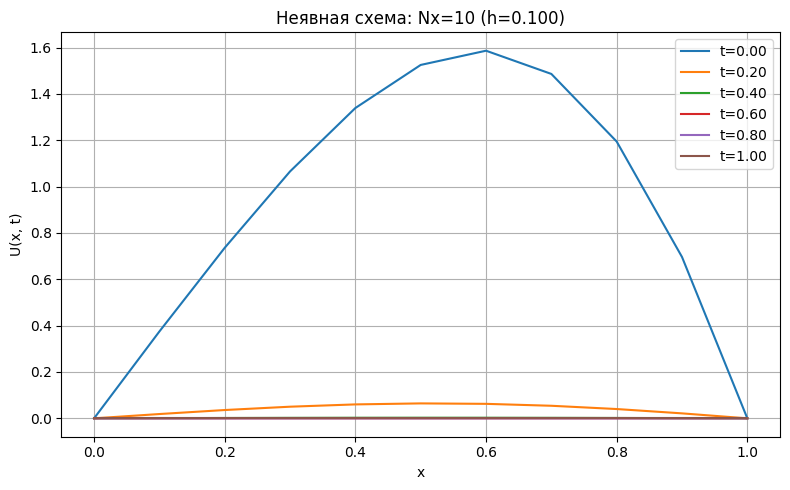

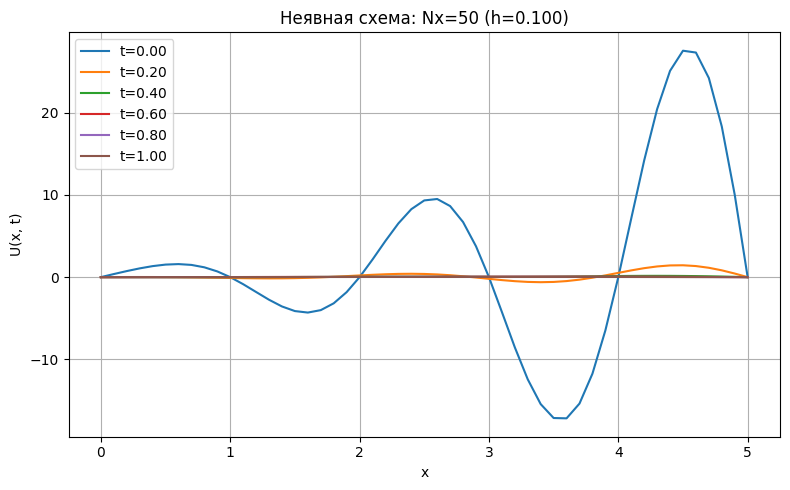

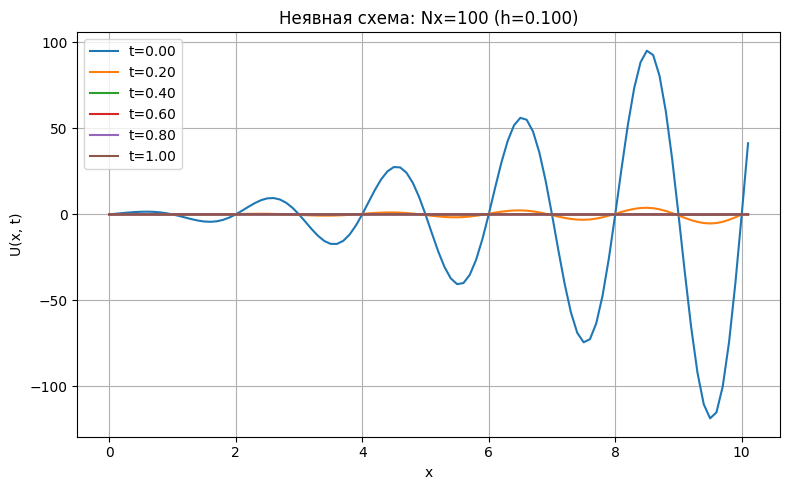

In [55]:
for i, n_i in enumerate(N_vals):
    x, t, u = solve_heat_equation_implicit(f, T_val, n_i, h=0.1)

    plot_slices_implicit(x, t, u, n_i)

## С L = 1.0

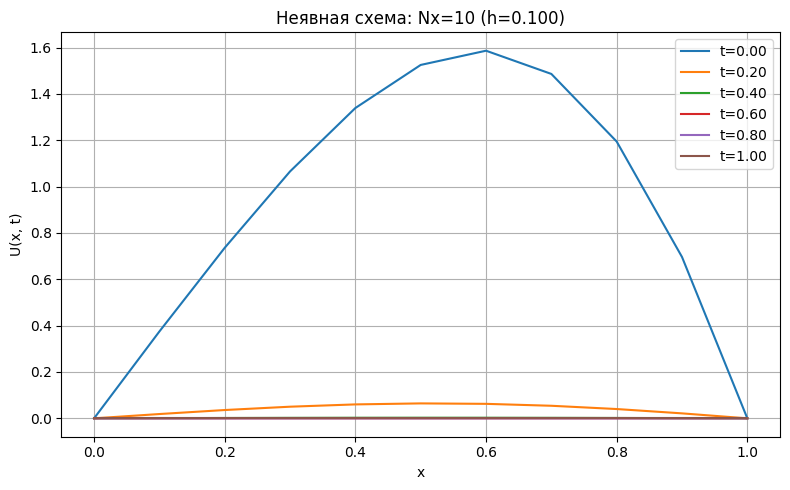

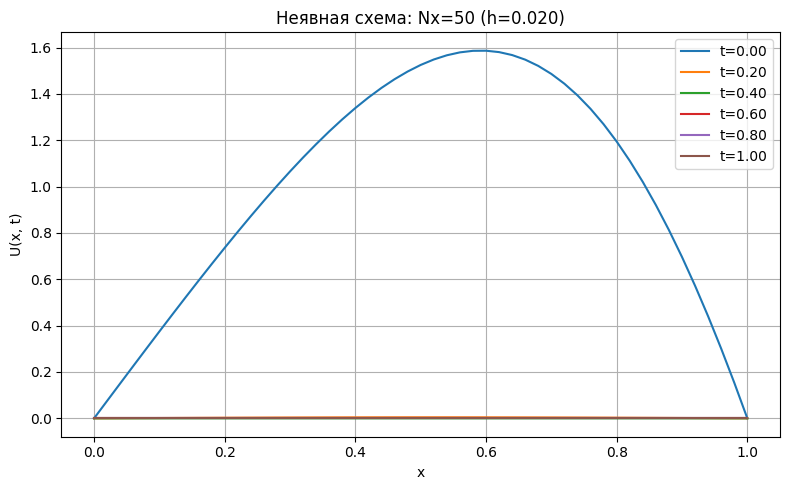

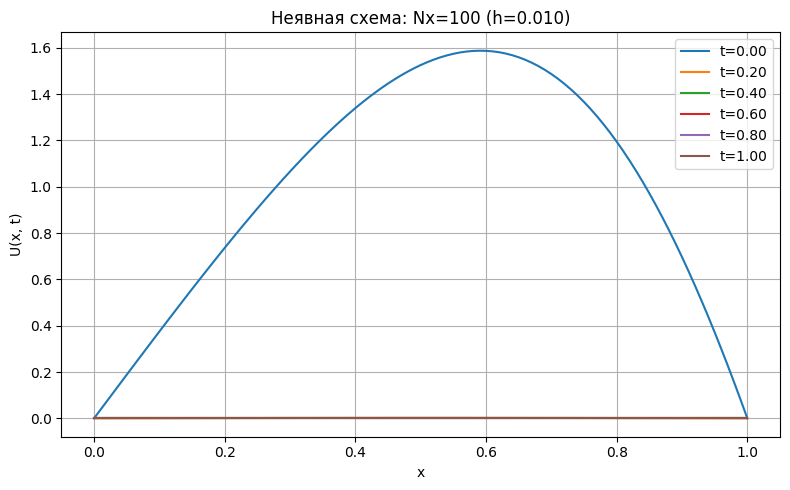

In [56]:
for i, n_i in enumerate(N_vals):
    x, t, u = solve_heat_equation_implicit(f, T_val, n_i)

    plot_slices_implicit(x, t, u, n_i)